<a href="https://colab.research.google.com/github/mbrady4/DS-Unit-1-Sprint-3-Data-Storytelling/blob/master/DS_Unit_1_Sprint_Challenge_3_Data_Storytelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 3

# Data Storytelling

In this sprint challenge you'll work with a dataset from **FiveThirtyEight's article, [Every Guest Jon Stewart Ever Had On ‘The Daily Show’](https://fivethirtyeight.com/features/every-guest-jon-stewart-ever-had-on-the-daily-show/)**!

# Part 0 — Run this starter code

You don't need to add or change anything here. Just run this cell and it loads the data for you, into a dataframe named `df`.

(You can explore the data if you want, but it's not required to pass the Sprint Challenge.)

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

url = 'https://raw.githubusercontent.com/fivethirtyeight/data/master/daily-show-guests/daily_show_guests.csv'
df = pd.read_csv(url).rename(columns={'YEAR': 'Year', 'Raw_Guest_List': 'Guest'})

def get_occupation(group):
    if group in ['Acting', 'Comedy', 'Musician']:
        return 'Acting, Comedy & Music'
    elif group in ['Media', 'media']:
        return 'Media'
    elif group in ['Government', 'Politician', 'Political Aide']:
        return 'Government and Politics'
    else:
        return 'Other'
      
df['Occupation'] = df['Group'].apply(get_occupation)

In [0]:
df.columns.tolist()

['Year', 'GoogleKnowlege_Occupation', 'Show', 'Group', 'Guest', 'Occupation']

In [0]:
df.sample(10)

,Year,GoogleKnowlege_Occupation,Show,Group,Guest,Occupation
2464,2014,Journalist,11/13/14,Media,Maziar Bahari & Gael Garcí_a Bernal,Media
609,2002,actor,6/3/02,Acting,Colin Firth,"Acting, Comedy & Music"
421,2001,actor,4/25/01,Acting,Tom Green,"Acting, Comedy & Music"
2139,2012,author,11/26/12,Media,David Nasaw,Media
2616,2015,author,2/4/15,Media,Wes Moore,Media
2163,2012,author,2/2/12,Media,David Agus,Media
2595,2015,actress,1/14/15,Acting,Julianne Moore,"Acting, Comedy & Music"
1062,2005,Former United States Secretary of Labor,4/18/05,Politician,Robert Reich,Government and Politics
171,2000,actor,1/18/00,Acting,Frankie Muniz,"Acting, Comedy & Music"
1630,2009,Stand-up comedian,10/26/09,Comedy,Susie Essman,"Acting, Comedy & Music"


# Part 1 — What's the breakdown of guests’ occupations per year?

For example, in 1999, what percentage of guests were actors, comedians, or musicians? What percentage were in the media? What percentage were in politics? What percentage were from another occupation?

Then, what about in 2000? In 2001? And so on, up through 2015.

So, **for each year of _The Daily Show_, calculate the percentage of guests from each occupation:**
- Acting, Comedy & Music
- Government and Politics
- Media
- Other

#### Hints:
You can make a crosstab. (See pandas documentation for examples, explanation, and parameters.)

You'll know you've calculated correctly when the percentage of "Acting, Comedy & Music" guests is 90.36% in 1999, and 45% in 2015.

**Optional Bonus Challenge:** Do additional insightful data exploration.

In [0]:
df['Occupation'].value_counts(normalize=True)

Acting, Comedy & Music     0.446714
Media                      0.280728
Government and Politics    0.142592
Other                      0.129967
Name: Occupation, dtype: float64

In [0]:
subset = pd.crosstab(df['Occupation'], df['Year'], values=df['Occupation'], aggfunc='count', normalize='columns').round(4)
subset

Year,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Occupation,,,,,,,,,,,,,,,,,
"Acting, Comedy & Music",0.9036,0.7396,0.7261,0.6226,0.5602,0.3841,0.3704,0.3602,0.2553,0.2073,0.2086,0.3515,0.3374,0.2683,0.4277,0.3926,0.45
Government and Politics,0.0120,0.0828,0.0382,0.0692,0.1024,0.2256,0.1605,0.1925,0.1702,0.2012,0.2086,0.1818,0.1656,0.2012,0.1265,0.1288,0.17
Media,0.0663,0.1243,0.1975,0.2642,0.2470,0.2744,0.3333,0.2919,0.3333,0.4695,0.3620,0.3030,0.3129,0.3171,0.3072,0.3252,0.24
Other,0.0181,0.0533,0.0382,0.0440,0.0904,0.1159,0.1358,0.1553,0.2411,0.1220,0.2209,0.1636,0.1840,0.2134,0.1386,0.1534,0.14


### Did the number of guests on the Daily Show change over time?

In [179]:
df['Year'].value_counts()

2000    169
2003    166
2013    166
1999    166
2010    165
2012    164
2008    164
2004    164
2009    163
2011    163
2014    163
2005    162
2006    161
2002    159
2001    157
2007    141
2015    100
Name: Year, dtype: int64

### Who was the most popular guest each year? 

In [182]:
df.groupby('Year')['Guest'].agg(lambda x:x.value_counts().index[0])

Year
1999       Pamela Anderson, Natalie Raitano, Molly Culver
2000                                             Bob Dole
2001                                           Ted Danson
2002                                           Tom Arnold
2003                                       Angelina Jolie
2004                                     Sen. John McCain
2005                                         Rachel Weisz
2006                                        Ricky Gervais
2007                                      Jake Gyllenhaal
2008                                       Brian Williams
2009                                           Gwen Ifill
2010                                      Austan Goolsbee
2011                             Trey Parker & Matt Stone
2012                      Warren Buffett and Carol Loomis
2013    Steve Carell, Will Ferrell, David Koechner & P...
2014                     Bruce Springsteen & Frank Caruso
2015                                        John Hargrove
Name: Gue

Note above does not account for ties

In [0]:
df_2013 = df[ df['Year'] == 2013 ]

In [190]:
df_2013['Guest'].value_counts(ascending=False).head()

Steve Carell, Will Ferrell, David Koechner & Paul Rudd    3
Keegan-Michael Key and Jordan Peele                       2
Reza Aslan                                                2
Tom Brokaw                                                2
Bob Odenkirk & David Cross                                2
Name: Guest, dtype: int64

# Part 2 — Recreate this explanatory visualization:

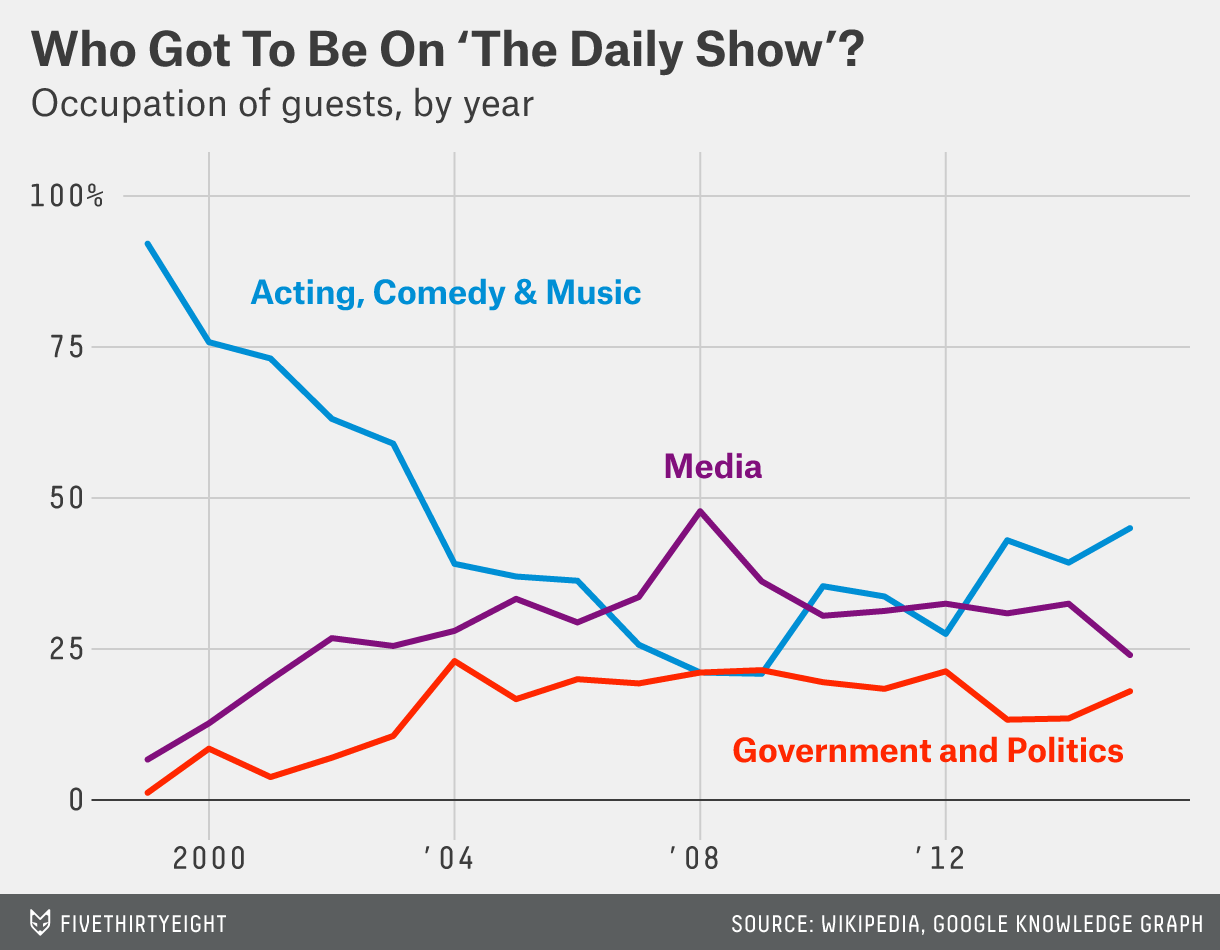

In [0]:
from IPython.display import display, Image
png = 'https://fivethirtyeight.com/wp-content/uploads/2015/08/hickey-datalab-dailyshow.png'
example = Image(png, width=500)
display(example)

**Hints:**
- You can choose any Python visualization library you want. I've verified the plot can be reproduced with matplotlib, pandas plot, or seaborn. I assume other libraries like altair or plotly would work too.
- If you choose to use seaborn, you may want to upgrade the version to 0.9.0.

**Expectations:** Your plot should include:
- 3 lines visualizing "occupation of guests, by year." The shapes of the lines should look roughly identical to 538's example. Each line should be a different color. (But you don't need to use the _same_ colors as 538.)
- Legend or labels for the lines. (But you don't need each label positioned next to its line or colored like 538.)
- Title in the upper left: _"Who Got To Be On 'The Daily Show'?"_ with more visual emphasis than the subtitle. (Bolder and/or larger font.)
- Subtitle underneath the title: _"Occupation of guests, by year"_

**Optional Bonus Challenge:**
- Give your plot polished aesthetics, with improved resemblance to the 538 example.
- Any visual element not specifically mentioned in the expectations is an optional bonus.

In [0]:
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np

In [0]:
subset_no_other = subset.drop(columns='Other')

In [0]:
subset_no_other = subset_no_other.T

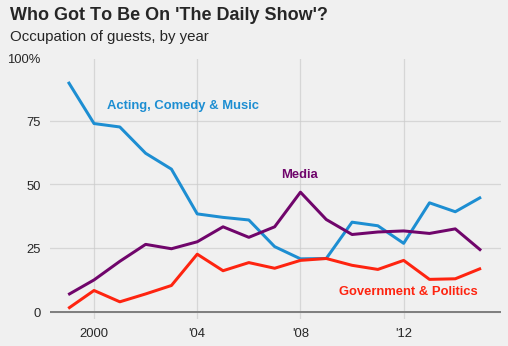

In [172]:
#Set plot style
plt.style.use('fivethirtyeight')

#Adjust figure size
fig, ax = plt.subplots(figsize=(7.25,4.5))

#Plot lines
subset_no_other.plot(ax=ax, 
                     color=('#1d8ed2', '#fe2410', '#70056b'), 
                     linewidth=3)

#Adjust axes
ax.set(yticks=[0,0.25,0.50,0.75,1],
       xticks=[2000, 2004, 2008, 2012]
      )
ax.set_xticklabels( ["2000", "'04", "'08", "'12"] )
ax.set_yticklabels( ["0", "25", "50", "75", "100%"] )
ax.tick_params(axis='both', labelsize=13)
ax.set_xlabel('')

#Add title
ax.text(x=1996.75,
        y=1.15, 
        s="Who Got To Be On 'The Daily Show'?",
        fontsize=18,
        fontweight='bold');
ax.text(x=1996.75,
        y=1.07, 
        s="Occupation of guests, by year",
        fontsize=15,
        fontweight='normal');

# Place legend on lines
ax.text(x=2007.25,
        y=0.53, 
        s="Media",
        fontsize=13,
        color='#70056b',
        fontweight='bold');
ax.text(x=2000.5,
        y=0.8, 
        s="Acting, Comedy & Music",
        fontsize=13,
        color='#1d8ed2',
        fontweight='bold');
ax.text(x=2009.5,
        y=0.07, 
        s="Government & Politics",
        fontsize=13,
        color='#fe2410',
        fontweight='bold');
ax.get_legend().remove()

# Add horizontal line at y=0 for emphasis
ax.axhline(linewidth=2, color='grey')

# Adjust color of gridlines
ax.grid(alpha=0.7, linewidth=1.25)

# Show plot without extra output
plt.show();

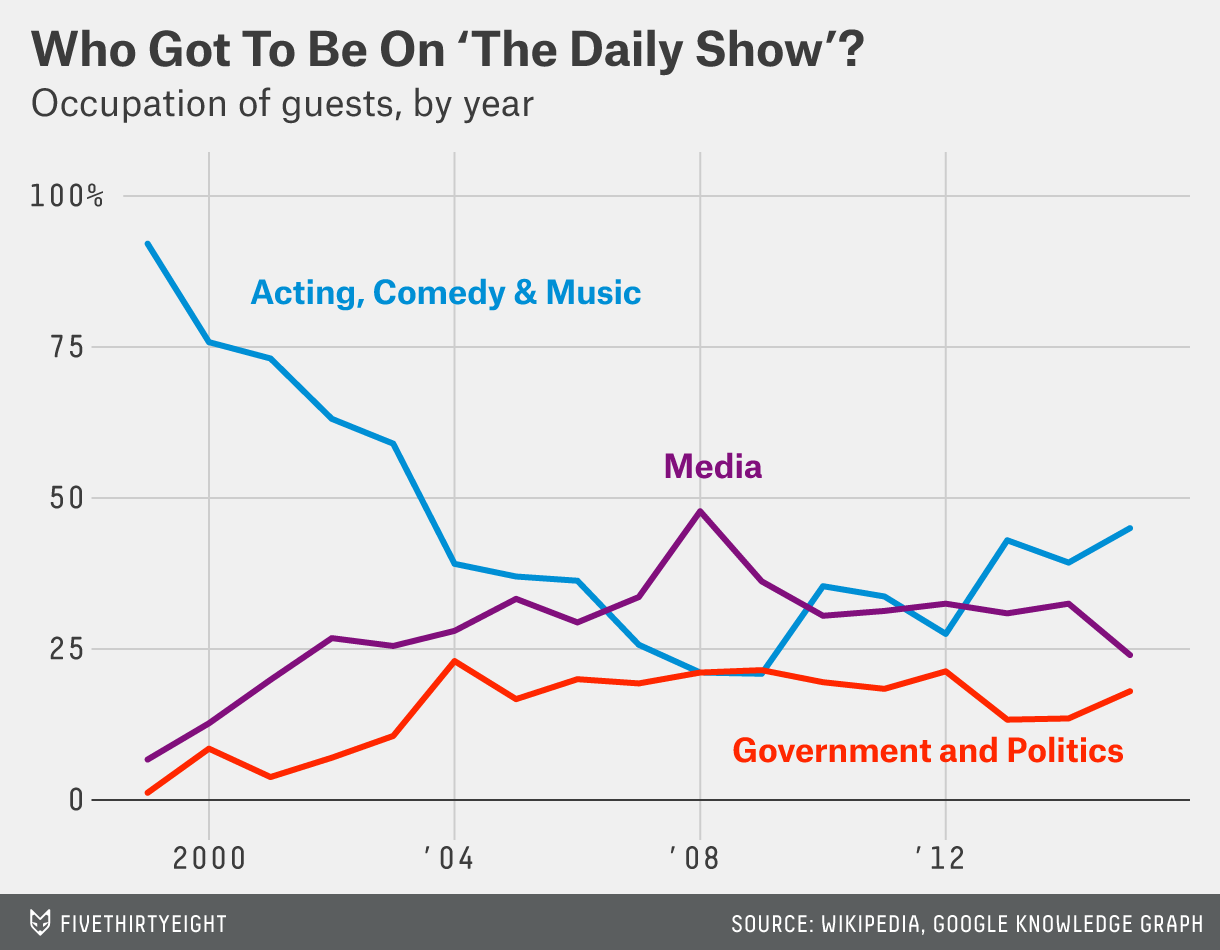

In [0]:
display(example)

# Part 3 — Who were the top 10 guests on _The Daily Show_?

**Make a plot** that shows their names and number of appearances.

**Add a title** of your choice.

**Expectations:** It's ok to make a simple, quick plot: exploratory, instead of explanatory. 

**Optional Bonus Challenge:** You can change aesthetics and add more annotation. For example, in a relevant location, could you add the text "19" to show that Fareed Zakaria appeared 19 times on _The Daily Show_? (And so on, for each of the top 10 guests.)

In [0]:
top_guests = df['Guest'].value_counts(ascending=False)[:10]

In [215]:
top_guests.head()

Fareed Zakaria    19
Denis Leary       17
Brian Williams    16
Paul Rudd         13
Ricky Gervais     13
Name: Guest, dtype: int64

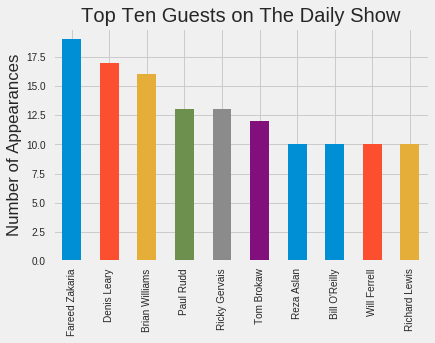

In [110]:
top_guests.plot.bar();
plt.title('Top Ten Guests on The Daily Show')
plt.ylabel('Number of Appearances')
plt.show()

### Adding Visual interest

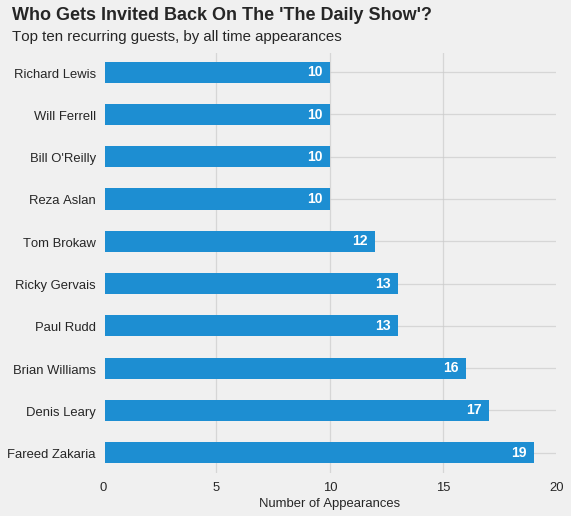

In [233]:
#Set plot style
plt.style.use('fivethirtyeight')

#Adjust figure size
fig, ax = plt.subplots(figsize=(7.25,7.25))

#Create bar chart
top_guests.plot.barh(ax=ax, 
                     color='#1d8ed2')

#Add title
ax.text(x=-4,
        y=10.25, 
        s="Who Gets Invited Back On The 'The Daily Show'?",
        fontsize=18,
        fontweight='bold');
ax.text(x=-4,
        y=9.75, 
        s="Top ten recurring guests, by all time appearances",
        fontsize=15,
        fontweight='normal');

#Adjust axes
ax.set(xticks=[0, 5, 10, 15, 20]
      )
ax.set_xticklabels( ["0", "5", "10", "15", "20"] )
ax.tick_params(axis='both', labelsize=13)
ax.set_xlabel('Number of Appearances', fontsize=13)

# Add labels to bars
for i, v in enumerate(top_guests):
    ax.text(v - 1, i-0.075, str(v), color='white', fontweight='bold')

# Adjust color of gridlines
ax.grid(alpha=0.7, linewidth=1.25)

# Show plot without extra output
plt.show();